# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  


### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?


`There were a total of 17 campaigns that were executed. All campaigns were completed by the Portuguese bank's own contact-center that used telephone communication as the form of directed marketing. Of the considered database, 6499 clients subscribed to a term deposit yielding anm 8% success rate.`

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
# Import relevant libraries
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import seaborn as sns
import time

# Scikit learn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import scipy.optimize as opt
from sklearn.svm import SVC 
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, plot_confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, roc_curve, RocCurveDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import category_encoders as ce

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



#### 3.1) Identify the Number of Null Values

<AxesSubplot:title={'center':'Number of null values per column'}>

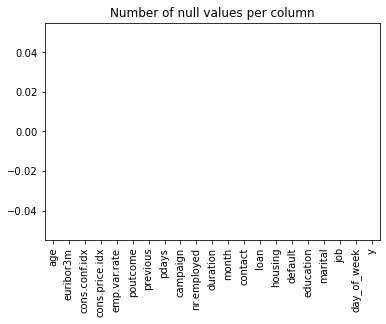

In [82]:
fig1 = df.isnull().sum().sort_values().plot(kind='bar')
plt.title('Number of null values per column')
fig1
# Because the graph is empty, there are no null values.

#### 3.2) Remove all rows where duration does not equal 0.

In [7]:
df_2 = df.query('duration != 0')
df_2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### Business Objective

The purpose of analyzing this data is to increase the efficiency of directed campaigns for long-term deposit subscriptions by finding a model that can identify main customer characteristics that lead to success of a contact (i.e., a client subscribing the deposit), help manage available resources better (e.g. human effort, phone calls, time), and select a high quality set of potential clients.

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [12]:
# Convert target column (y) to 0 or 1
df_2['y'] = df['y'].map({'yes':1 ,'no':0})
df_2.head()

C:\Users\Kristen Wang\AppData\Local\Temp\ipykernel_10448\2845540795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['y'] = df['y'].map({'yes':1 ,'no':0})


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


#### 5.1) Use leave one out encoding to convert the categorical values of columns 2-7 to numerical values.

In [13]:
encoder = ce.LeaveOneOutEncoder(return_df = True)
df_2_loo = encoder.fit_transform(df_2.drop(columns = ['contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']), df_2['y'])
df_2_loo.head()

,age,job,marital,education,default,housing,loan,y
0,56,0.100094,0.101589,0.102515,0.128810,0.108808,0.113419,0
1,57,0.081401,0.101589,0.108389,0.051536,0.108808,0.113419,0
2,37,0.081401,0.101589,0.108389,0.128810,0.116215,0.113419,0
3,40,0.129750,0.101589,0.082060,0.128810,0.108808,0.113419,0
4,56,0.081401,0.101589,0.108389,0.128810,0.108808,0.109332,0


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [14]:
X = df_2_loo.drop(columns = 'y')
y = df_2_loo['y']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print ('Training set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Training set: (28828, 7) (28828,)
Test set: (12356, 7) (12356,)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [101]:
# Check y status split.
df_2_count = df_2_loo['y'].value_counts().to_frame()
df_2_count

,y
0,36544
1,4640


Text(0.5, 1.0, 'Number of clients that subscribed to a term deposit (y = 1) vs. did not subscribe (y = 0)')

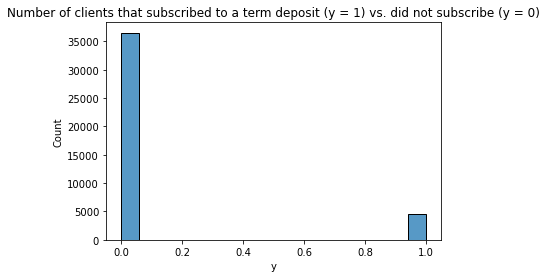

In [102]:
sns.histplot(data=df_2_loo, x="y")
plt.title('Number of clients that subscribed to a term deposit (y = 1) vs. did not subscribe (y = 0)')

The baseline of our data is 36544 people who did not subscribe to long-term deposits and 4640 people who did.

### Problem 8: A Simple Model: Basic Logistic Regression

Use Logistic Regression with default hyperparameter values to build a basic model of your data

In [17]:
# Set logistic regression with default C and solver
start = time.time()

lr_model = LogisticRegression().fit(X_train, y_train)

end = time.time()
print(end - start)

0.269411563873291


In [18]:
lr_model.predict_proba(X_test)

array([[0.68892316, 0.31107684],
       [0.88756677, 0.11243323],
       [0.90548591, 0.09451409],
       ...,
       [0.87577005, 0.12422995],
       [0.90007117, 0.09992883],
       [0.89380429, 0.10619571]])

### Problem 9: Score Your Basic Logistic Regression Model

What is the accuracy of your model?

In [19]:
lr_model.score(X_train, y_train)

0.8873317607881227

In [20]:
lr_model.score(X_test, y_test)

0.8873421819359016

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

### 10.1) Basic KNN Model

In [21]:
start = time.time()

knn_model = KNeighborsClassifier().fit(X_train, y_train)

end = time.time()
print(end - start)

0.08876466751098633


#### 10.1.1) Score Basic KNN Model

In [22]:
knn_model.score(X_train, y_train)

0.9197655057582905

In [23]:
knn_model.score(X_test, y_test)

0.8995629653609583

### 10.2) Basic Decision Tree Model

In [24]:
start = time.time()

dtree_model = DecisionTreeClassifier().fit(X_train, y_train)

end = time.time()
print(end - start)

0.033908843994140625


#### 10.2.1) Score Basic Decision Tree Model

In [25]:
dtree_model.score(X_train, y_train)

1.0

In [26]:
dtree_model.score(X_test, y_test)

1.0

### 10.3) SVM

In [27]:
start = time.time()

svc_model = SVC().fit(X_train, y_train)

end = time.time()
print(end - start)

19.195914268493652


#### 10.3.1) Score Basic SVM

In [28]:
svc_model.score(X_train, y_train)

0.8873317607881227

In [29]:
svc_model.score(X_test, y_test)

0.8873421819359016

### 10.4) Plotting DataFrame

In [73]:
result_default = {'model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVC'],
           'train score': ['0.887', '0.920', '1.00', '0.887'],
           'test score': ['0.887', '0.900', '1.00', '0.887'],
           'average fit time': ['0.269', '0.089', '0.034', '19.2']}
results_default_df = pd.DataFrame(result_default).set_index('model')
results_default_df

,train score,test score,average fit time
model,,,
Logistic Regression,0.887,0.887,0.269
KNN,0.920,0.900,0.089
Decision Tree,1.00,1.00,0.034
SVC,0.887,0.887,19.2


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### 11.1) More Feature Engineering and Exploration
Instead of only considering the first 7 columns of the dataset, I will now consider all columns of the dataset from this point forward. 

In [31]:
# Use leave one out encoding to convert all categorical values to numerical values.
df_3_loo = encoder.fit_transform(df_2, df_2['y'])
df_3_loo.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0.100094,0.101589,0.102515,0.128810,0.108808,0.113419,0.05232,0.064361,0.099507,...,1,999,0,0.088335,1.1,93.994,-36.4,4.857,5191.0,0
1,57,0.081401,0.101589,0.108389,0.051536,0.108808,0.113419,0.05232,0.064361,0.099507,...,1,999,0,0.088335,1.1,93.994,-36.4,4.857,5191.0,0
2,37,0.081401,0.101589,0.108389,0.128810,0.116215,0.113419,0.05232,0.064361,0.099507,...,1,999,0,0.088335,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0.129750,0.101589,0.082060,0.128810,0.108808,0.113419,0.05232,0.064361,0.099507,...,1,999,0,0.088335,1.1,93.994,-36.4,4.857,5191.0,0
4,56,0.081401,0.101589,0.108389,0.128810,0.108808,0.109332,0.05232,0.064361,0.099507,...,1,999,0,0.088335,1.1,93.994,-36.4,4.857,5191.0,0


### 11.1.2) Train/test split
With the newly prepared data, split it into a train and test set. The "imp" is shorthand for "improve" as we are improving our model by including all features collected by the dataset.

In [32]:
X_imp = df_3_loo.drop(columns = 'y')
y_imp = df_3_loo['y']

In [33]:
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_imp, y_imp, test_size = 0.3, random_state = 42)
print ('Training set:', X_train_imp.shape,  y_train_imp.shape)
print ('Test set:', X_test_imp.shape,  y_test_imp.shape)

Training set: (28828, 20) (28828,)
Test set: (12356, 20) (12356,)


### 11.1.3) Improving Logistic Regression: Using All Features

In [34]:
# Set logistic regression with default C and solver
start = time.time()

lr_model_imp = LogisticRegression(max_iter = 1000).fit(X_train_imp, y_train_imp)

end = time.time()
print(end - start)

0.858374834060669


In [35]:
lr_model_imp.predict_proba(X_test_imp)

array([[0.68758079, 0.31241921],
       [0.98777431, 0.01222569],
       [0.97521925, 0.02478075],
       ...,
       [0.94344215, 0.05655785],
       [0.97486782, 0.02513218],
       [0.97625475, 0.02374525]])

#### 11.1.3.1) Score Improved Logistic Regression Model

In [36]:
lr_model_imp.score(X_train_imp, y_train_imp)

0.908144859164701

In [37]:
lr_model_imp.score(X_test_imp, y_test_imp)

0.911540951764325

### 11.1.4) Improving KNN: Using All Features

In [38]:
start = time.time()

knn_model_imp = KNeighborsClassifier().fit(X_train_imp, y_train_imp)

end = time.time()
print(end - start)

0.010970115661621094


#### 11.1.4.1) Score Improved KNN Model

In [39]:
knn_model_imp.score(X_train_imp, y_train_imp)

0.932183987789649

In [40]:
knn_model_imp.score(X_test_imp, y_test_imp)

0.9063612819682745

### 11.1.5) Improving Decision Tree: Using All Features

In [41]:
start = time.time()

dtree_model_imp = DecisionTreeClassifier().fit(X_train_imp, y_train_imp)

end = time.time()
print(end - start)

0.26334428787231445


#### 11.1.5.1) Score Improved Decision Tree Model

In [43]:
dtree_model_imp.score(X_train_imp, y_train_imp)

1.0

In [44]:
dtree_model_imp.score(X_test_imp, y_test_imp)

1.0

In [45]:
dtree_model_imp.tree_.max_depth

15

### 11.1.6) Improving SVM: Using all features

In [46]:
start = time.time()

svc_model_imp = SVC().fit(X_train_imp, y_train_imp)

end = time.time()
print(end - start)

22.097049474716187


#### 11.1.6.1) Score Improved SVM

In [47]:
svc_model_imp.score(X_train_imp, y_train_imp)

0.8977383099764118

In [48]:
svc_model_imp.score(X_test_imp, y_test_imp)

0.8974587245063127

### 11.1.7) Plotting DataFrame

In [74]:
result_improve = {'model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVC'],
           'train score': ['0.908', '0.932', '1.00', '0.898'],
           'test score': ['0.912', '0.906', '1.00', '0.897'],
           'average fit time': ['0.858', '0.011', '0.263', '22.1']}
result_improve_df = pd.DataFrame(result_improve).set_index('model')
result_improve_df

,train score,test score,average fit time
model,,,
Logistic Regression,0.908,0.912,0.858
KNN,0.932,0.906,0.011
Decision Tree,1.00,1.00,0.263
SVC,0.898,0.897,22.1


### 11.2) Hyperparameter tuning and grid search
Using all features and GridSearchCV or RandomizedSearchCV to tune hyperparameters.

### 11.2.1) Logistic Regression

In [49]:
lr_params = {'C': np.logspace(-3,3,7),
          'solver': ['liblinear']
         }

In [50]:
start = time.time()
lr_grid = GridSearchCV(LogisticRegression(random_state = 42, max_iter = 100000), param_grid=lr_params, cv = 5).fit(X_train_imp, y_train_imp)
end = time.time()
print(end - start)

13.19729208946228


In [75]:
best_params_lr_grid = lr_grid.best_params_

train_acc_lr_grid = lr_grid.score(X_train_imp, y_train_imp)
test_acc_lr_grid = lr_grid.score(X_test_imp, y_test_imp)

print(f'Training Accuracy: {train_acc_lr_grid: .3f}')
print(f'Test Accuracy: {test_acc_lr_grid: .3f}')
print('best_params_grid: ', best_params_lr_grid)

Training Accuracy:  0.908
Test Accuracy:  0.911
best_params_grid:  {'C': 1.0, 'solver': 'liblinear'}


### 11.2.2) KNN

In [52]:
knn_params = { 'n_neighbors' : [5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [53]:
start = time.time()
knn_grid = RandomizedSearchCV(KNeighborsClassifier(), param_distributions = knn_params, cv = 5).fit(X_train_imp, y_train_imp)
end = time.time()
print(end - start)

326.52693367004395


In [76]:
best_params_knn_grid = knn_grid.best_params_

train_acc_knn_grid = knn_grid.score(X_train_imp, y_train_imp)
test_acc_knn_grid = knn_grid.score(X_test_imp, y_test_imp)

print(f'Training Accuracy: {train_acc_knn_grid: .3f}')
print(f'Test Accuracy: {test_acc_knn_grid: .3f}')
print('best_params_grid: ', best_params_knn_grid)

Training Accuracy:  0.916
Test Accuracy:  0.913
best_params_grid:  {'weights': 'uniform', 'n_neighbors': 27, 'metric': 'minkowski'}


### 11.2.3) Decision Tree

In [55]:
tree_params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
         'min_samples_split': [2, 3, 4, 5],
          'criterion': ['gini', 'entropy'],
          'min_samples_leaf': [1, 2, 3, 4, 5]
         }

In [56]:
start = time.time()
tree_gridsearch = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid=tree_params, cv = 5).fit(X_train_imp, y_train_imp)
end = time.time()
print(end - start)

366.23976397514343


In [77]:
best_params_tree_grid = tree_gridsearch.best_params_

train_acc_tree_grid = tree_gridsearch.score(X_train_imp, y_train_imp)
test_acc_tree_grid = tree_gridsearch.score(X_test_imp, y_test_imp)

print(f'Training Accuracy: {train_acc_tree_grid: .3f}')
print(f'Test Accuracy: {test_acc_tree_grid: .3f}')
print('best_params_grid: ', best_params_tree_grid)

Training Accuracy:  1.000
Test Accuracy:  1.000
best_params_grid:  {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 2}


### 11.2.4) SVM

In [59]:
#SVC_params = {'C': [0.1, 1, 10, 100, 1000], 
#              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#              'kernel': ['rbf']
#         }

In [70]:
SVM_params = {'C': [0.1, 1, 10, 100, 1000, 10000, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10],
              'kernel': ['linear', 'poly', 'rbf']
         }

In [71]:
start = time.time()
SVM_grid = GridSearchCV(SVC(random_state = 42), param_grid=SVC_params, cv = 5).fit(X_train_imp, y_train_imp)
end = time.time()
print(end - start)

645.2071394920349


In [78]:
best_params_SVM_grid = SVM_grid.best_params_

train_acc_SVM_grid = SVM_grid.score(X_train_imp, y_train_imp)
test_acc_SVM_grid = SVM_grid.score(X_test_imp, y_test_imp)

print(f'Training Accuracy: {train_acc_SVM_grid: .3f}')
print(f'Test Accuracy: {test_acc_SVM_grid: .3f}')
print('best_params_grid: ', best_params_SVM_grid)

Training Accuracy:  0.903
Test Accuracy:  0.905
best_params_grid:  {'C': 1000, 'kernel': 'rbf'}


### 11.2.5) Plot DataFrame

In [79]:
result_gridsearch = {'model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVC'],
           'train score': ['0.908', '0.916', '1.00', '0.903'],
           'test score': ['0.911', '0.913', '1.00', '0.905'],
           'best parameter': ['C = 1.0; solver = liblinear', 'weights = uniform; n_neighbors = 27; metric = minkowski', 'criterion = entropy; max_depth = 7; min_samples_leaf = 3; min_samples_split = 2', 'C = 1000; kernel = rbf']}
result_gridsearch_df = pd.DataFrame(result_gridsearch).set_index('model')
result_gridsearch_df

,train score,test score,best parameter
model,,,
Logistic Regression,0.908,0.911,C = 1.0; solver = liblinear
KNN,0.916,0.913,weights = uniform; n_neighbors = 27; metric = ...
Decision Tree,1.00,1.00,criterion = entropy; max_depth = 7; min_sample...
SVC,0.903,0.905,C = 1000; kernel = rbf


### 12) Summary and Conclusions

#### Summary
In summary, the goal of this practical application was to compare the performance of the classifiers that were encountered in modules 12-16: namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines. To compare the classifier performances, we utilized a dataset related to marketing bank products over the telephone. The importance of analyzing this dataset is to increase the efficiency of directed campaigns for long-term deposit subscriptions by finding a model that can identify main customer characteristics that lead to success of a contact (i.e., a client subscribing the deposit), help manage available resources better (e.g. human effort, phone calls, time), and select a high quality set of potential clients. The results are as follows.

#### Table 12.1) Basic Models Using Default Hyperparameters

In [104]:
results_default_df

,train score,test score,average fit time
model,,,
Logistic Regression,0.887,0.887,0.269
KNN,0.920,0.900,0.089
Decision Tree,1.00,1.00,0.034
SVC,0.887,0.887,19.2


#### Table 12.2) Improved Models Using Default Hyperparameters but Including All Features From Dataset

In [106]:
result_improve_df

,train score,test score,average fit time
model,,,
Logistic Regression,0.908,0.912,0.858
KNN,0.932,0.906,0.011
Decision Tree,1.00,1.00,0.263
SVC,0.898,0.897,22.1


#### Table 12.3) Improved Models Using Tuned Hyperparameters Found Using GridSearchCV Method and Including All Features From Dataset

In [107]:
result_gridsearch_df

,train score,test score,best parameter
model,,,
Logistic Regression,0.908,0.911,C = 1.0; solver = liblinear
KNN,0.916,0.913,weights = uniform; n_neighbors = 27; metric = ...
Decision Tree,1.00,1.00,criterion = entropy; max_depth = 7; min_sample...
SVC,0.903,0.905,C = 1000; kernel = rbf


It is important to not that the metric used to score the classifier acting on the training dataset and test dataset was accuracy and the average fit time is recorded in seconds. From the above tables, we see that the decision tree classifier is consistently the most accurate classifier for both the training and test sets whether default parameters were used with minimal dataset features or if the hyperparameters were tuned and all dataset features were used. The classifier that exhibited the lowest accuracy score was the support vector machine method. 

#### Conclusions
In conclusion, the model that can identify main customer characteristics that lead to a client subscribing to a long-term deposit is best determined by using a decision tree classifier as it has the best training and testing accuracies as compared to the other classifiers. In other words, you can confidently predict whether a client would want to subscribe to a long-term deposit without having to call them or use up other resources.  
For clients who are predicted to subscribe to long-term deposits, I recommend you to directly send them emails with an attached link that leads them to a webpage that allows for easy subscription to long-term deposits. 